<a href="https://colab.research.google.com/github/KlaineK/CompBio2023/blob/main/ComputationalBio_Ses3_KeshiaJeanDarma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computational Biology - LAB Session 3
DNA 
CGAT

A-T

T-A

G-C

C-G

RNA 
CGAU

A-U

C-G

G-C



Transcription : proses DNA menjadi RNA, mengubah beberapa nukleotida

Translation : mengubah RNA menjadi polipeptida



In [3]:
!pip install Bio
from Bio.Seq import Seq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.3 MB/s eta 0:00:00


In [7]:
#melihat function yang ada di library
dir(Seq)

['__abstractmethods__',
 '__add__',
 '__array_ufunc__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_data',
 'back_transcribe',
 'complement',
 'complement_rna',
 'count',
 'count_overlap',
 'defined',
 'defined_ranges',
 'endswith',
 'find',
 'index',
 'islower',
 'isupper',
 'join',
 'lower',
 'lstrip',
 'replace',
 'reverse_complement',
 'reverse_complement_rna',
 'rfind',
 'rindex',
 'rsplit',
 'rstrip',
 'split',
 'startswith',
 'strip',
 'transcribe',
 'translate',
 'ungap',
 'upper']

In [6]:
#Create Main Sequence
#Template Strand
main_seq = Seq('TACTAGAGCATT')
#main_seq
print(main_seq)

#coding strand : RNA hasil transkripsi dari komplemen template strand

TACTAGAGCATT


In [12]:
#change template strand to coding strand
#complement adalah built-in function, jika ingin dipanggil, harus diberi ()
main_seq.complement()

#template strand
print(main_seq)
print('||||||||||||')
#coding strand
print(main_seq.complement())


TACTAGAGCATT
||||||||||||
ATGATCTCGTAA


In [14]:
#reverse complement 
print(main_seq.reverse_complement())

AATGCTCTAGTA


In [21]:
#change DNA strand to mRNA strand
#function transcribe mengambil hasil coding strand baru ditranskripsi menjadi mRNA
code_strand = main_seq.complement()
mRNA = code_strand.transcribe()

print('mRNA ', mRNA)


mRNA  AUGAUCUCGUAA


In [26]:
#change mRNA strand back to DNA Strand
#hasil back_transcribe adalah coding strand
#jika mau mengembalikan ke template strand, harus di complement
print('DNA            ', mRNA.back_transcribe())

print('Template Strand', mRNA.back_transcribe().complement())


coding_strand = mRNA.back_transcribe()
template_strand = coding_strand.complement()
print(coding_strand)
print(template_strand)


DNA             ATGATCTCGTAA
Template Strand TACTAGAGCATT
ATGATCTCGTAA
TACTAGAGCATT


Standard Codon Chart

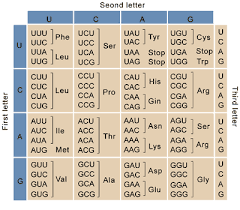

In [28]:
#change mRNA strand to polypeptide
print(mRNA)
#ditranslasi tiap codonnya
#Met, Ile, Ser, Stop(*)
mRNA.translate()

AUGAUCUCGUAA


Seq('MIS*')

In [29]:
#change stop symbol
print(mRNA.translate(stop_symbol='^'))

MIS^


In [33]:
#change DNA strand to polypeptide
coding_strand = main_seq.complement()
print('main_seq : ', main_seq)
print('coding_strand : ', coding_strand)
#one letter sequence
print(coding_strand.translate())

main_seq :  TACTAGAGCATT
coding_strand :  ATGATCTCGTAA
MIS*


In [53]:
#change from template strand to polypeptide
main_seq.complement().transcribe().translate()

Seq('MIS*')

In [32]:
#untuk three letter sequence perlu import library baru
from Bio.SeqUtils import seq3, seq1

In [35]:
#make polypeptide variable
polypeptide = mRNA.translate()
polypeptide

Seq('MIS*')

In [38]:
#change to 3 letter sequence
poly3 = seq3(polypeptide)
print('poly3 : ', poly3)

#change 3 letter sequence to 1 letter sequence
poly1 = seq1(poly3)
print('poly1 : ', poly1)

poly3 :  MetIleSerTer
poly1 :  MIS*


In [41]:
#codon chart
from Bio.Data import CodonTable as ct
dir(ct)

['AmbiguousCodonTable',
 'AmbiguousForwardTable',
 'CodonTable',
 'IUPACData',
 'NCBICodonTable',
 'NCBICodonTableDNA',
 'NCBICodonTableRNA',
 'TranslationError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ambiguous_dna_by_id',
 'ambiguous_dna_by_name',
 'ambiguous_generic_by_id',
 'ambiguous_generic_by_name',
 'ambiguous_rna_by_id',
 'ambiguous_rna_by_name',
 'generic_by_id',
 'generic_by_name',
 'list_ambiguous_codons',
 'list_possible_proteins',
 'make_back_table',
 'register_ncbi_table',
 'standard_dna_table',
 'standard_rna_table',
 'unambiguous_dna_by_id',
 'unambiguous_dna_by_name',
 'unambiguous_rna_by_id',
 'unambiguous_rna_by_name']

In [51]:
print('DNA chart\n', ct.unambiguous_dna_by_name['Standard'])
print('DNA chart\n', ct.unambiguous_dna_by_name['Vertebrate Mitochondrial'])


DNA chart
 Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
-

In [52]:
print('RNA chart\n', ct.unambiguous_rna_by_name['Standard'])
print('RNA chart\n', ct.unambiguous_rna_by_name['Vertebrate Mitochondrial'])


RNA chart
 Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
-

Exercise

In [54]:
#template strand
!pip install Bio
from Bio.Seq import Seq


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
seq0 = Seq('GGAGTCGCTATT')
code_strand0 = seq0.complement()
mrna0 = seq0.complement().transcribe()
polypeptide3 = seq3(mrna0.translate())

#template strand
print(seq0)
#coding strand
print(code_strand0)
#mRNA strand
print(mrna0)
#mRNA translated
print(mrna0.translate())
#mRNA translated into polypeptide, 3 letter sequenced
print('polypeptide :' + polypeptide3)

GGAGTCGCTATT
CCTCAGCGATAA
CCUCAGCGAUAA
PQR*
polypeptide :ProGlnArgTer


In [63]:
print(ct.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

unambiguous codon : codes for 1 amino acids
ambiguous codon : codes for more than 1 amino acids